In [62]:
import tensorflow as tf
from datasets import load_dataset, Image
from PIL import Image

In [63]:
# Common Python libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# For reading in images and image manipulation
import cv2
# For label encoding the target variable
from sklearn.preprocessing import LabelEncoder
# For tensor based operations
from tensorflow.keras.utils import to_categorical, normalize
# For Machine Learning
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# For face detection
from mtcnn.mtcnn import MTCNN

In [64]:
trainingset = pd.read_csv('mafa_mask_recog_two.csv')

In [65]:
trainingset['x'] = trainingset['x'].astype(str).replace({"\[":"", "\]":""}, regex=True).astype(int)

In [66]:
trainingset.replace("")

,Unnamed: 0,imgName,x,y,w,h,classification,x1,x2,y1,y2
0,0,train_00000001.jpg,95,[160],[91],[91],face_with_mask,[113],[177],[158],[172]
1,1,train_00000002.jpg,107,[82],[66],[66],face_with_mask,[129],[95],[156],[96]
2,2,train_00000003.jpg,56,[170],[185],[185],face_with_mask,[140],[198],[196],[208]
3,3,train_00000004.jpg,162,[208],[71],[71],face_with_mask,[182],[229],[203],[238]
4,4,train_00000005.jpg,86,[69],[99],[99],face_with_mask,[134],[93],[165],[98]
...,...,...,...,...,...,...,...,...,...,...,...
23079,25871,train_00025872.jpg,44,[4],[107],[107],face_with_mask,[67],[21],[119],[20]
23080,25872,train_00025873.jpg,31,[3],[80],[80],face_with_mask,[58],[18],[90],[29]
23081,25873,train_00025874.jpg,14,[28],[83],[83],face_with_mask,[33],[51],[72],[56]
23082,25874,train_00025875.jpg,38,[4],[72],[72],face_with_mask,[60],[23],[93],[21]


In [67]:
trainingset = trainingset.drop(["Unnamed: 0"], axis=1)

In [68]:
trainingset['y'] = trainingset['y'].astype(str).replace({"\[":"", "\]":""}, regex=True).astype(int)
trainingset['w'] = trainingset['w'].astype(str).replace({"\[":"", "\]":""}, regex=True).astype(int)
trainingset['h'] = trainingset['h'].astype(str).replace({"\[":"", "\]":""}, regex=True).astype(int)
trainingset['x1'] = trainingset['x1'].astype(str).replace({"\[":"", "\]":""}, regex=True).astype(int)
trainingset['x2'] = trainingset['x2'].astype(str).replace({"\[":"", "\]":""}, regex=True).astype(int)
trainingset['y1'] = trainingset['y1'].astype(str).replace({"\[":"", "\]":""}, regex=True).astype(int)
trainingset['y2'] = trainingset['y2'].astype(str).replace({"\[":"", "\]":""}, regex=True).astype(int)

In [85]:
trainingset

,imgName,x,y,w,h,classification,x1,x2,y1,y2
0,train_00000001.jpg,95,160,91,91,face_with_mask,113,177,158,172
1,train_00000002.jpg,107,82,66,66,face_with_mask,129,95,156,96
2,train_00000003.jpg,56,170,185,185,face_with_mask,140,198,196,208
3,train_00000004.jpg,162,208,71,71,face_with_mask,182,229,203,238
4,train_00000005.jpg,86,69,99,99,face_with_mask,134,93,165,98
...,...,...,...,...,...,...,...,...,...,...
23079,train_00025872.jpg,44,4,107,107,face_with_mask,67,21,119,20
23080,train_00025873.jpg,31,3,80,80,face_with_mask,58,18,90,29
23081,train_00025874.jpg,14,28,83,83,face_with_mask,33,51,72,56
23082,train_00025875.jpg,38,4,72,72,face_with_mask,60,23,93,21


In [69]:
trainingset['imgName'].astype(str)

0        train_00000001.jpg
1        train_00000002.jpg
2        train_00000003.jpg
3        train_00000004.jpg
4        train_00000005.jpg
                ...        
23079    train_00025872.jpg
23080    train_00025873.jpg
23081    train_00025874.jpg
23082    train_00025875.jpg
23083    train_00025876.jpg
Name: imgName, Length: 23084, dtype: object

In [70]:
trainingset['classification'].astype(str)

0        face_with_mask
1        face_with_mask
2        face_with_mask
3        face_with_mask
4        face_with_mask
              ...      
23079    face_with_mask
23080    face_with_mask
23081    face_with_mask
23082    face_with_mask
23083    face_with_mask
Name: classification, Length: 23084, dtype: object

In [71]:
# Contains images of medical masks
images_file_path = "./MAFA/train-images/images/"
# Fetching all the file names in the image directory
image_filenames = os.listdir(images_file_path)
# Printing out the first five image names
print(image_filenames[:5])

['train_00000001.jpg', 'train_00000002.jpg', 'train_00000003.jpg', 'train_00000004.jpg', 'train_00000005.jpg']


In [72]:
# Getting the full image filepath
sample_image_name = trainingset.iloc[0]['imgName']
sample_image_file_path = images_file_path + sample_image_name

# Select rows with the same image name as in the "name" column of the train dataframe
sel_df = trainingset[trainingset['imgName'] == sample_image_name]

# Convert all of the available "bbox" values into a list
boundboxes = sel_df[["x", "y", "w", "h", "x1", "x2", "y1", "y2"]].values.tolist()
boundboxes[0]

[95, 160, 91, 91, 113, 177, 158, 172]

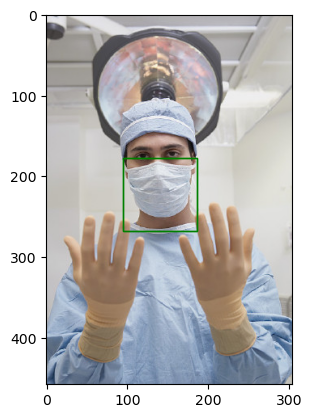

In [73]:
# Creating a figure and a sub-plot
fig, ax = plt.subplots()

# Reading in the image as an array
img = plt.imread(sample_image_file_path)

#Showing the image
ax.imshow(img)

im = cv2.imread(sample_image_file_path)

height = im.shape[0]
width = im.shape[1]

# Plotting the bounding boxes
for box in boundboxes:
    x, y, w, h, x1, x2, y1, y2 = box
    
    widthBox = x2-x1
    
    heightBox = y2-y1
    
    # x and y co-ordinates
    xy = (x, x2)

    rect = patches.Rectangle(
        xy,
        w,
        h,
        linewidth=1,
        edgecolor="g",
        facecolor="none",
    )

    ax.add_patch(rect)
    ax.add_patch(rect)

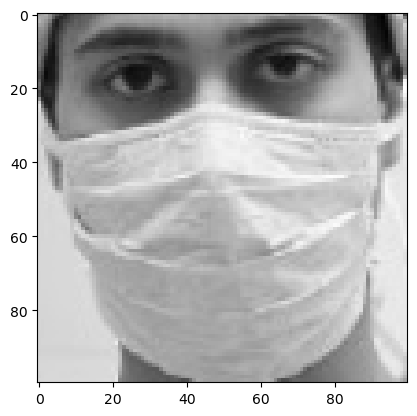

In [74]:
img_size = (100, 100)
data = []
for index, row in trainingset.iterrows():
    # Single row
    imgName, x, y, w, h, className, x1, x2, y1, y2 = row.values
    # Full file path
    full_file_path = images_file_path + imgName
    # Reading in the image array as a grayscale image
    img_array = cv2.imread(full_file_path, 0)
    # Selecting the portion covered by the bounding box
    
    crop_image = img_array[y:y+h, x:x+w]
    #Resizing the image
    new_img_array = cv2.resize(crop_image, img_size)

    data.append([new_img_array, className])
    
plt.imshow(data[0][0], cmap="gray")

In [75]:
# Initializing an empty list for features (independent variables)
x = []

# Initializing an empty list for labels (dependent variable)
y = []

for features, labels in data:
    x.append(features)
    y.append(labels)

In [76]:
# Reshaping the feature array (Number of images, IMG_SIZE, IMG_SIZE, Color depth)
x = np.array(x).reshape(-1, 100, 100, 1)
# Normalizing
x = normalize(x, axis=1)
# Label encoding y
lbl = LabelEncoder()
y = lbl.fit_transform(y)
# Converting it into a categorical variable
y = to_categorical(y)

In [77]:
input_img_shape = x.shape[1:]
print(input_img_shape)

(100, 100, 1)


In [78]:
# Initializing a sequential keras model
model = Sequential()
# Adding a 2D convolution layer
model.add(
    Conv2D(
        filters=100,
        kernel_size=(5, 5),
        use_bias=True,
        input_shape=input_img_shape,
        activation="relu",
        strides=2,
    )
)
# Adding a max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Adding a 2D convolution layer - Output Shape = 10 x 10 x 64
model.add(Conv2D(filters=64, kernel_size=(3, 3), use_bias=True, activation="relu"))
# Adding a max-pooling layer - Output Shape = 5 x 5 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))
# Adding a flatten layer - Output Shape = 5 x 5 x 64 = 1600
model.add(Flatten())
# Adding a dense layer - Output Shape = 50
model.add(Dense(100, activation="relu"))
# Adding a dropout
model.add(Dropout(0.2))
# Adding a dense layer with softmax activation
model.add(Dense(2, activation="softmax"))
# Printing the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 48, 48, 100)       2600      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 24, 24, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 22, 22, 64)        57664     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 7744)              0         
                                                                 
 dense_57 (Dense)            (None, 100)              

In [79]:
# Initializing an Adam optimizer
opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3, decay=1e-5)
# Configuring the model for training
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
# Training the model
model.fit(x, y, epochs=30, batch_size=5)

Epoch 1/30
4617/4617 [==============================] - 62s 13ms/step - loss: 0.2756 - accuracy: 0.9212
Epoch 2/30
4617/4617 [==============================] - 54s 12ms/step - loss: 0.2301 - accuracy: 0.9215
Epoch 3/30
4617/4617 [==============================] - 56s 12ms/step - loss: 0.2158 - accuracy: 0.9215
Epoch 4/30
4617/4617 [==============================] - 57s 12ms/step - loss: 0.2003 - accuracy: 0.9215
Epoch 5/30
4617/4617 [==============================] - 58s 12ms/step - loss: 0.1860 - accuracy: 0.9215
Epoch 6/30
4617/4617 [==============================] - 53s 11ms/step - loss: 0.1746 - accuracy: 0.9276
Epoch 7/30
4617/4617 [==============================] - 53s 11ms/step - loss: 0.1655 - accuracy: 0.9359
Epoch 8/30
4617/4617 [==============================] - 53s 12ms/step - loss: 0.1541 - accuracy: 0.9388
Epoch 9/30
4617/4617 [==============================] - 56s 12ms/step - loss: 0.1438 - accuracy: 0.9429
Epoch 10/30
4617/4617 [==============================] - 54s 12m

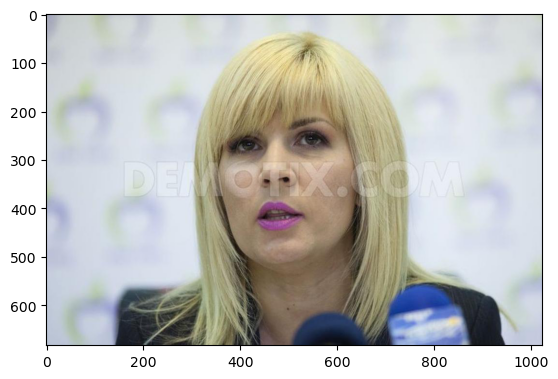

In [86]:
# Image file path for sample image
test_image_file_path = "./WIDER_train/WIDER_train/images/8--Election_Campain/8_Election_Campain_Election_Campaign_8_64.jpg"
# Loading in the image
img = plt.imread(test_image_file_path)
# Showing the image
plt.imshow(img)

In [87]:
# Initializing the detector
detector = MTCNN()
# Detecting the faces in the image
faces = detector.detect_faces(img)
print(faces)

1/1 [==============================] - 0s 113ms/step
[{'box': [347, 128, 293, 382], 'confidence': 0.9995487332344055, 'keypoints': {'left_eye': (411, 269), 'right_eye': (546, 260), 'nose': (470, 324), 'mouth_left': (433, 419), 'mouth_right': (535, 415)}}]


1/1 [==============================] - 0s 94ms/step


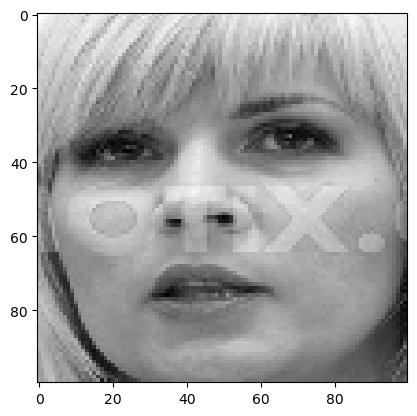

In [88]:
img_array = cv2.imread(test_image_file_path, cv2.IMREAD_GRAYSCALE)
# Initializing the detector
detector = MTCNN()
# Detecting the faces in the image
faces = detector.detect_faces(img)
# Getting the values for bounding box
x, y, w, h = faces[0]["box"]
# Selecting the portion covered by the bounding box
crop_image = img_array[y:y+h, x:x+w]
# Resizing the image
new_img_array = cv2.resize(crop_image, img_size)
# Plotting the image
plt.imshow(new_img_array, cmap="gray")

In [89]:
# Reshaping the image
x = new_img_array.reshape(-1, 100, 100, 1)
# Normalizing
x = normalize(x, axis=1)

In [90]:
prediction = model.predict(x)
print(prediction)

1/1 [==============================] - 0s 19ms/step
[[0.99892277 0.00107715]]


In [ ]:
#If arr[1] < arr[0], then the person is masked, otherwise they do not have a mask on.